The objective of this notebook is to solve the following problem:

"INTRODUCTION

You have been given a collection of 2D line segments, referred to as 'sticks'. Some of these sticks cross each other. Your objective
is to find the largest subset of sticks from this set such that no two sticks cross.

ASSIGNMENTS

* Read in the stick set and store it in an appropriate data structure.
* Find the largest subset of sticks such that no two sticks cross.
* print the number of sticks in your subset."

So, I imported those libraries:

In [1]:
import pandas as pd #para carregar arquivos csv
import math
import random
import itertools
import matplotlib.pyplot as plt
import numpy as np

I do the following functions, these functions are responsible for the graphical representation of the sticks in various formats, like lists of [xm,xM],[ym,yM], dictionaries or index lists.

In [2]:
def plot_sticks(sticks,xm,xM,ym,yM):
  for i in sticks:
    plt.plot(i[0], i[1], marker='o')
  plt.xlim(xm, xM)
  plt.ylim(ym,yM)

  # Definindo rótulos e título
  plt.xlabel('Posição X')
  plt.ylabel('Posição Y')
  plt.title('Total Sticks')
  plt.show()


In [3]:
def plot_sticks_dic(sticks,xm,xM,ym,yM):
  for i,valor in sticks.items():
    plt.plot(valor[0],valor[1], marker='o',label=str(i))
  plt.xlim(xm, xM)
  plt.ylim(ym,yM)
  # Definindo rótulos e título
  plt.xlabel('Posição X')
  plt.ylabel('Posição Y')
  plt.title('Sticks')
  plt.legend()
  plt.show()


In [4]:
def plot_sticks_dicList(list_sticks,sticks,xm,xM,ym,yM):
  for i in list_sticks:
    plt.plot(sticks[i][0],sticks[i][1], marker='o',label=str(i))
  plt.xlim(xm, xM)
  plt.ylim(ym,yM)
  # Definindo rótulos e título
  plt.xlabel('Posição X')
  plt.ylabel('Posição Y')
  plt.title('The best combination of Sticks that they dont´t intersept with each other.')
  plt.legend()
  plt.show()


The following function takes two sticks and checks whether they intersect (False if not and True if yes)

In [5]:
# intersection between line S1 and line S2
def is_intersecting(s1, s2):
    x1,x2 = s1[0]
    y1,y2 = s1[1]
    x3,x4 = s2[0]
    y3,y4 = s2[1]
    denom = (y4-y3)*(x2-x1) - (x4-x3)*(y2-y1)
    if denom == 0: # parallel
        return False
    ua = ((x4-x3)*(y1-y3) - (y4-y3)*(x1-x3)) / denom
    if ua < 0 or ua > 1: # out of range
        return False
    ub = ((x2-x1)*(y1-y3) - (y2-y1)*(x1-x3)) / denom
    if ub < 0 or ub > 1: # out of range
        return False
    x = x1 + ua * (x2-x1)
    y = y1 + ua * (y2-y1)
    return True



Finally, this function receives the path of the CSV file and the plot projection indications, and determines the largest (or one of the largest) sets of non-intersecting sticks (this version is brute force based but more optimised than a full scan).

In [6]:
def find_non_intersecting_sticks(path,print_total=False,print_biggers=False):
    #Transferir os sticks do CSV e guardar numa lista com as posições das extremidades
    sticks= pd.read_csv(path)
    sticks_list=[]
    for index, row in sticks.iterrows():
        x_values = [row['start_x'], row['end_x']]
        y_values = [row['start_y'], row['end_y']]
        sticks_list.append([x_values,y_values])

    #sticks_list=sticks_list[:10]

    #imprimir os sticks todos
    if print_total:
      plot_sticks(sticks_list,0,100,0,100)

    #ordenar a lista de sticks
    sticks_list.sort(key=lambda stick: (stick[0][0], stick[1][0]))

    big_sublists=[] # serve para guardar as maiores combinações de sticks que não se interceptam em cada combinação

    # Inicializa um dicionário que contem o numero do stick por ordem crescente de x_inicial e as respetivas coordenadas
    max_set_for_stick = {i: sticks_list[i] for i in range(len(sticks_list))}

    active_dic={}

    # Preenchendo o novo dicionário
    for i, chave in enumerate(max_set_for_stick):
      active_dic[i] = {'no_intersept': [], 'combination': []}

    for i in range(len(active_dic)):
      for j in range(i+1,len(active_dic)):
            segmento1 = max_set_for_stick[i]
            segmento2 = max_set_for_stick[j]
            if is_intersecting(segmento1, segmento2)==False: #se não interceptar faço coisas!
               active_dic[j]['no_intersept'].append(i) #pode ser para remover?
               comuns = [lista for lista in active_dic[i]['combination'] if lista in active_dic[j]['combination']] #encontro os elementos comuns
               comuns_update = [sublista + [i] for sublista in comuns]+[[i]] #Adiciono i a cada sublista dos eleemntos comuns e no fim junto a sublista [i]
               active_dic[j]['combination']= active_dic[j]['combination'] + comuns_update # Atualizo o combinations com as novas combinações de sticks que não se interceptam
            else:
              pass
    # vai a cada 'combination' e guarda a maior sublista (acrescentando o respetivo indice a cada sublista)
    for i in range(len(active_dic)):
      big_sublists=big_sublists + [max([sublista + [i] for sublista in active_dic[i]['combination']]+[[i]],key=len)]

    #dessas sublistas, extraio a maior de todas
    the_biggers = max(big_sublists,key=len)

    # imprimir a (uma das maiores) maior combinação de sticks que não se interceptam
    if print_biggers:
      plot_sticks_dicList(the_biggers,max_set_for_stick,0,100,0,100)

    return the_biggers




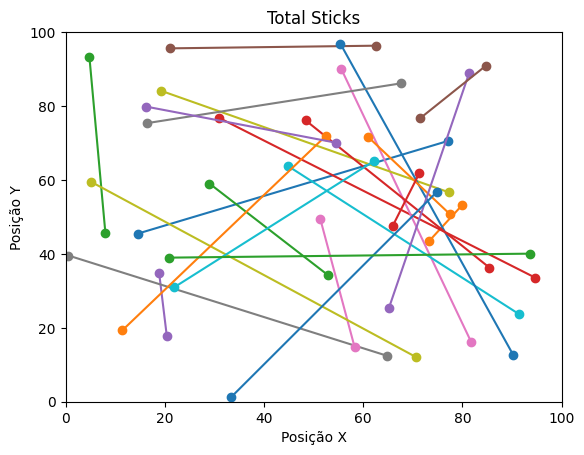

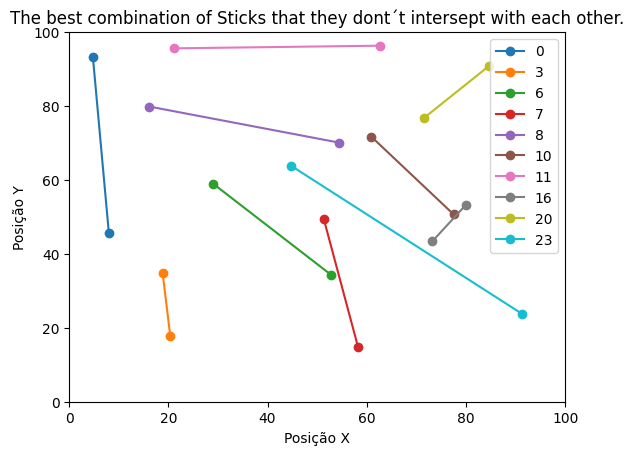

[0, 3, 6, 7, 8, 10, 11, 16, 20, 23]


In [7]:
print(find_non_intersecting_sticks('/content/drive/MyDrive/DataScience_problems/coding-challenges/4_sticky_sticks.csv',True,True))